In [12]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [13]:
import numpy as np
import calendar
from helpers import *
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path
from strategies import basic_strategy_old
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [14]:
year = 2024
month = 1
temperature = 0.1
minute = 40

days_in_month = calendar.monthrange(year, month)[1]

In [ ]:
daily_results = {}

crypto1 = 'BTC'
crypto2 = 'XRP'

# crypto1_returns_day_before = pd.read_parquet('../data/crypto1USDT/crypto1USDT-1s-2024-01-01.parquet')['Open'].pct_change().rolling(window=5).mean().iloc[-3600:]
# crypto2_returns_day_before = pd.read_parquet('../data/crypto2USDT/crypto2USDT-1s-2024-01-01.parquet')['Open'].pct_change().rolling(window=5).mean().iloc[-3600:]

for day in range(2, days_in_month + 1):
    day_str = f"{day:02d}"  
    print(f"Processing day: {year}-{month:02d}-{day_str}")
    
    crypto1_path = f'../data/{crypto1}USDT/{crypto1}USDT-1s-{year}-{month:02d}-{day_str}.parquet'
    # crypto2_path = f'../data/XRPUSDT/XRPUSDT-1s-{year}-{month:02d}-{day_str}.parquet'
    crypto2_path = f'../data/{crypto2}USDT/{crypto2}USDT-1s-{year}-{month:02d}-{day_str}.parquet'
    lead_lag_path = f'../data/{crypto1}-{crypto2}/{crypto1}-{crypto2}-metrics-{year}-{month:02d}-{day_str}.parquet'

    try:
        crypto1_data = pd.read_parquet(crypto1_path)
        crypto2_data = pd.read_parquet(crypto2_path)
        lead_lag_data = pd.read_parquet(lead_lag_path)
    except FileNotFoundError:
        print(f"Data for {year}-{month:02d}-{day_str} not found, skipping...")
        continue

    crypto1_prices = crypto1_data['Open']
    crypto2_prices = crypto2_data['Open']

    crypto1_returns = crypto1_prices.pct_change()[1:]
    crypto2_returns = crypto2_prices.pct_change()[1:]

    df_avg = lead_lag_data['avg']

    strategy_result = basic_strategy_old(
        crypto1_prices[1:], 
        crypto1_returns, 
        crypto2_prices[1:], 
        crypto2_returns, 
        df_avg,
        40
    )

print("Finished processing all days.")
82796

Processing day: 2024-01-02
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
Total money after strategy: Base amount + 0.0024667099818233007, Long trades: 126, Short trades: 135, Long returns: -6.000189335603486, Short returns: 3.0028167976001807
Processing day: 2024-01-03
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
Total money after strategy: Base amount + 0.004073726302571079, Long trades: 127, Short trades: 130, Long returns: -5.990811155425115, Short returns: 7.994876662030473
Processing day: 2024-01-04
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
Total money after strategy: Base amount + 0.007776816826870592, Long trades: 171, Short trades: 178, Long returns: -4.995500252112125, Short returns: 4.0033773955197525
Processing day: 2024-01-05
BLABLABA
BLABLABA
BLABLABA
BLABLABA
BLABLABA
Total money after strategy: Base amount + 0.01233359

82796

In [16]:
df = pd.read_csv('daily_returns.csv', header=None)
df.columns = ['Daily Returns', 'Long Trades', 'Short Trades', 'Long Returns', 'Short Returns']

df.head()

,Daily Returns,Long Trades,Short Trades,Long Returns,Short Returns
0,-0.004768,85,85,-0.001201,-0.003567
1,0.008171,99,104,0.004750,0.003421
2,0.003128,93,120,0.003141,2.000086
3,0.006909,117,111,-1.988917,1.995828
4,0.006712,117,100,0.004635,0.002077


In [17]:
df.sum(numeric_only=True)

Daily Returns       0.217845
Long Trades      6053.000000
Short Trades     6387.000000
Long Returns     -157.882751
Short Returns     163.099588
dtype: float64

In [18]:
lead_lag_path = f'../data/crypto1-crypto2/crypto1-crypto2-metrics-{year}-{month:02d}-02.parquet'
a=pd.read_parquet(lead_lag_path)

a['avg'].plot()

FileNotFoundError: [Errno 2] No such file or directory: '../data/crypto1-crypto2/crypto1-crypto2-metrics-2024-01-02.parquet'

In [8]:
crypto1_path = f'../data/crypto1USDT/crypto1USDT-1s-{year}-{month:02d}-{18}.parquet'
xrp_path = f'../data/XRPUSDT/XRPUSDT-1s-{year}-{month:02d}-{18}.parquet'

In [9]:
crypto1_data = pd.read_parquet(crypto1_path)
xrp_data = pd.read_parquet(xrp_path)

In [10]:
crypto1_data.head()

,Open time,Open
0,1705536000000,42776.09
1,1705536001000,42776.10
2,1705536002000,42776.10
3,1705536003000,42776.10
4,1705536004000,42776.10


<Axes: >

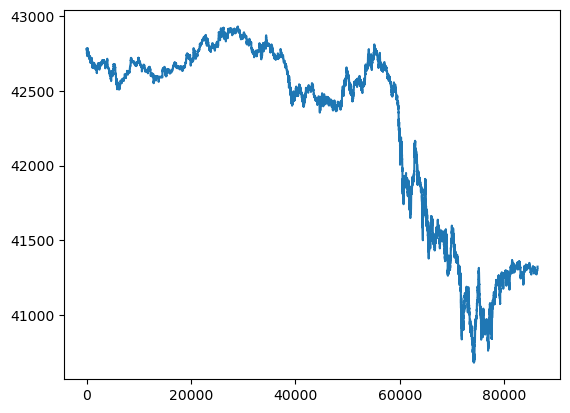

In [ ]:
crypto1_data['Open'].plot()

<Axes: >

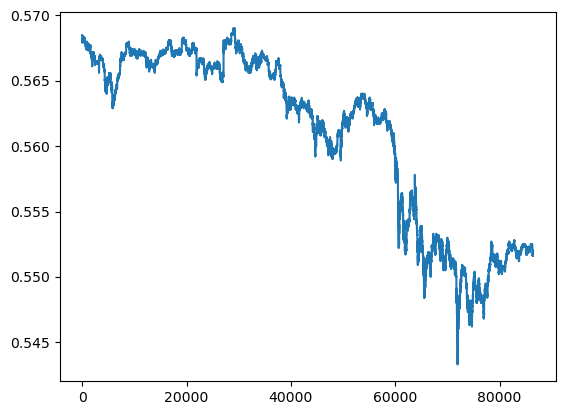

In [12]:
xrp_data['Open'].plot()

In [13]:
crypto1_path = f'../data/crypto1USDT/crypto1USDT-1s-{year}-{month:02d}-{22}.parquet'
crypto2_path = f'../data/crypto2USDT/crypto2USDT-1s-{year}-{month:02d}-{22}.parquet'

In [14]:
crypto1_data = pd.read_parquet(crypto1_path)
crypto2_data = pd.read_parquet(crypto2_path)

In [15]:
crypto1_data.head()

,Open time,Open
0,1705881600000,41580.32
1,1705881601000,41580.32
2,1705881602000,41580.32
3,1705881603000,41580.32
4,1705881604000,41575.33


<Axes: >

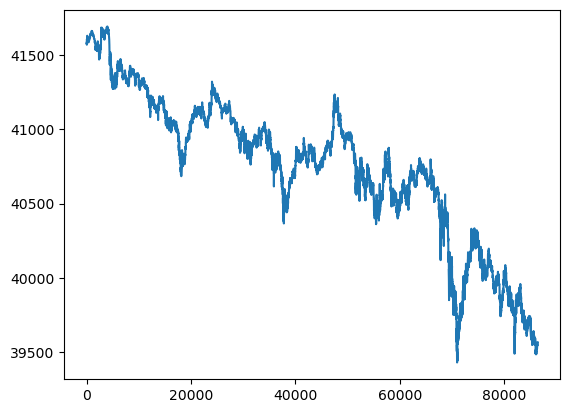

In [ ]:
crypto1_data['Open'].plot()

<Axes: >

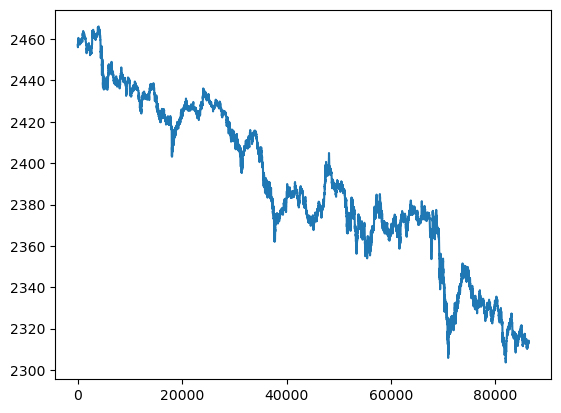

In [ ]:
crypto2_data['Open'].plot()

In [18]:
# import sys
# import os

# parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# sys.path.append(parent_dir)
# import numpy as np
# import calendar
# from helpers import *
# from thermal_optimal_path.lattice import partition_function
# from thermal_optimal_path.statistics import average_path
# from strategies import basic_strategy_old
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# import pandas as pd
# year = 2024
# month = 1
# temperature = 0.1
# minute = 40

# days_in_month = calendar.monthrange(year, month)[1]

In [ ]:
# lead_lag_path = f'../data/crypto1-crypto2/crypto1-crypto2-metrics-{year}-{month:02d}-{22}.parquet'

# try:
#     crypto1_data = pd.read_parquet(crypto1_path)
#     crypto2_data = pd.read_parquet(crypto2_path)
#     lead_lag_data = pd.read_parquet(lead_lag_path)
# except FileNotFoundError:
#     print(f"Data for {year}-{month:02d}-{day_str} not found, skipping...")

# crypto1_prices = crypto1_data['Open']
# crypto2_prices = crypto2_data['Open']

# crypto1_returns = crypto1_prices.pct_change()[1:]
# crypto2_returns = crypto2_prices.pct_change()[1:]

# df_avg = lead_lag_data['avg']

# strategy_result = basic_strategy_old(
#     crypto1_prices[1:], 
#     crypto1_returns, 
#     crypto2_prices[1:], 
#     crypto2_returns, 
#     df_avg,
#     40
# )

In [30]:
lead_lag_path = f'../data/crypto1-crypto2/crypto1-crypto2-metrics-{year}-{month:02d}-{day_str}.parquet'

lead_lag_data = pd.read_parquet(lead_lag_path)
lead_lag_data.head(3640)

,Open time,avg,std
0,1706659200000,NaN,NaN
1,1706659201000,NaN,NaN
2,1706659202000,NaN,NaN
3,1706659203000,NaN,NaN
4,1706659204000,NaN,NaN
...,...,...,...
3635,1706662835000,NaN,NaN
3636,1706662836000,NaN,NaN
3637,1706662837000,NaN,NaN
3638,1706662838000,NaN,NaN


<Axes: >

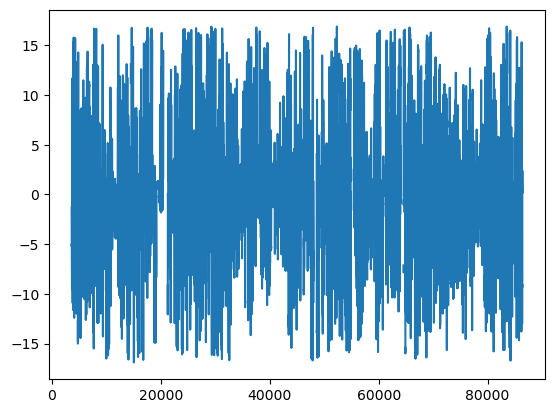

In [ ]:
lead_lag_data['avg'].plot()

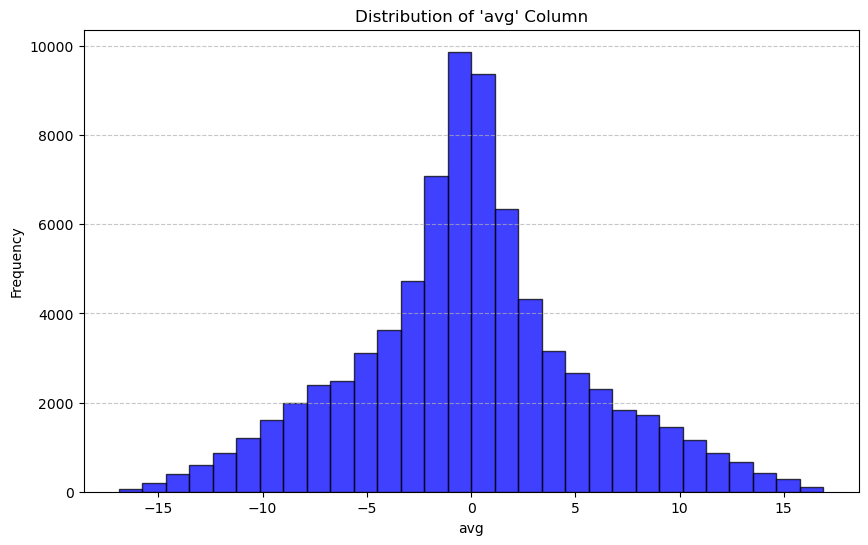

np.float64(nan)

In [ ]:
from scipy.stats import percentileofscore

plt.figure(figsize=(10, 6))

plt.hist(lead_lag_data["avg"], bins=30, alpha=0.75, color='blue', edgecolor='black')

plt.title("Distribution of 'avg' Column")

plt.xlabel("avg")

plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



value = 6.67

percentile = percentileofscore(lead_lag_data["avg"], value, kind="rank")



percentile